In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd

sns.set(rc={'figure.figsize':(10, 6)})
sns.set_context("talk")
sns.set_style("whitegrid")
flatui = ["#8B0ABE",  "#4989F5", "#FE2665", "#F28201", "#FFB624" ,"#e74c3c", "#34495e",'gold', "deeppink", "#3498db", "#95a5a6",  "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71", "darkviolet"]
sns.set_palette(flatui)


## Data characteristics
* tweets_df.csv is a csv of tweets from October 2023 until March 2023 that mostly revolve around the October 7th War between Hamas and Israel
* There are about 80k tweets in total

In [12]:
def extract_after_last_period(s):
    """
    function that extracts from a string all the characters that come after the last period
    """
    return s[s.rfind('.') + 1:] if '.' in s else s

tweets_df = pd.read_csv('tweets_df.csv')
tweets_df = tweets_df.rename(columns=lambda col: extract_after_last_period(col))
tweets_df.head()

,published,url,content,lang,word_count,nsfw_level,sentiment,post_type,engagement,twitter_impressions,twitter_likes,twitter_retweets,twitter_quote_tweets,twitter_replies,twitter_followers,country,name,gender,description,ave
0,2023-10-07 08:22:09,http://twitter.com/Faytuks/status/171052590201...,IDF airstrikes in Gaza are underway. QT @idfon...,en,22,0,0,TEXT,264,0,214,49,1,0,127316,Norway,Faytuks News Δ,MALE,Fast & reliable news provider || Covering geop...,5092.64
1,2023-10-07 08:26:35,http://twitter.com/lookner/status/171052701555...,"""The Air Force is now attacking targets of the...",en,36,15,-5,TEXT,125,0,87,38,0,0,139780,United States,Steve Lookner,MALE,News Anchor & Founder of @AgendaFreeTV. Specia...,5591.20
2,2023-10-07 08:33:45,http://twitter.com/sentdefender/status/1710528...,"Israeli Minister of Defense, Yoav Gallant has ...",en,25,0,0,TEXT,853,0,682,153,18,0,514815,United States,OSINTdefender,UNKNOWN,Open Source Intelligence Monitor focused on Eu...,20592.60
3,2023-10-07 10:05:35,http://twitter.com/manniefabian/status/1710551...,"Defense Minister Yoav Gallant: ""Hamas made a g...",en,40,0,-5,TEXT,665,0,505,149,11,0,41279,Israel,Emanuel (Mannie) Fabian,MALE,@TimesOfIsrael military correspondent | @beng...,1651.16
4,2023-10-07 10:08:34,http://twitter.com/JoeTruzman/status/171055268...,Israeli Minister of Defense Yoav Gallant follo...,en,44,0,-5,VIDEO,8055,0,6345,1577,133,0,64779,United States,Joe Truzman,MALE,Research analyst focused on Palestinian armed ...,2591.16


In [13]:
print(tweets_df['post_type'].value_counts(dropna=False, normalize=True))
print("\n\n")
print(tweets_df['gender'].value_counts(dropna=False, normalize=True))
print("\n\n")
print(tweets_df['lang'].value_counts(dropna=False, normalize=True))
print("\n\n")
print(tweets_df['country'].value_counts(dropna=False, normalize=True))

post_type
VIDEO    0.326221
IMAGE    0.304478
TEXT     0.289868
LINK     0.079434
Name: proportion, dtype: float64



gender
MALE       0.511517
FEMALE     0.301268
UNKNOWN    0.187215
Name: proportion, dtype: float64



lang
en    1.0
Name: proportion, dtype: float64



country
United States     0.437359
United Kingdom    0.115467
Palestine         0.097992
Israel            0.060962
India             0.037915
                    ...   
Bulgaria          0.000012
Lithuania         0.000012
Senegal           0.000012
Mauritania        0.000012
Seychelles        0.000012
Name: proportion, Length: 161, dtype: float64


## The distribution of the categorical features:
* the only language is English
* there is approximately even distribution between image, text and video, with fewer links
* there is a majority of male writers
* the countries that compromise the majority: US, UK, Palestine and Israel


### Let's plot the amount of tweets over time

<Axes: xlabel='date', ylabel='size'>

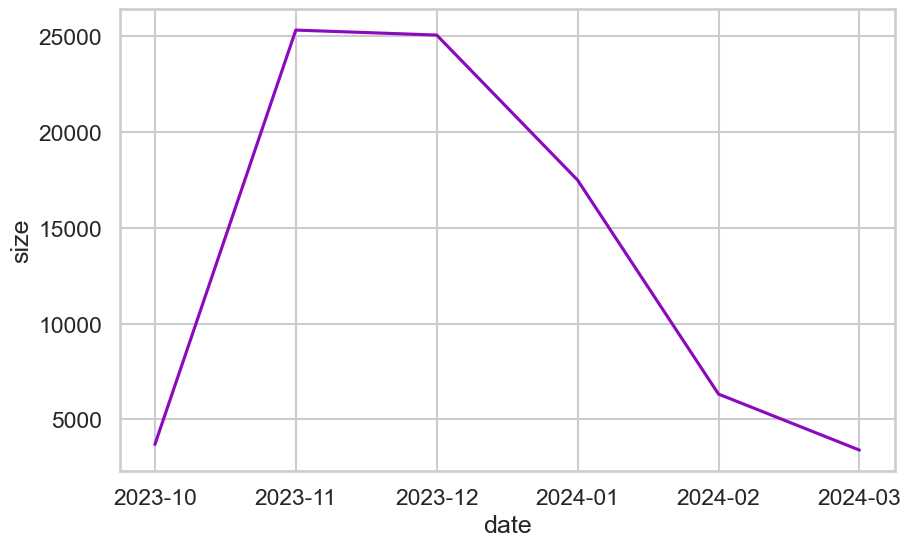

In [19]:
# group by months
tweets_df['published'] = pd.to_datetime(tweets_df['published'])

df_to_plot = (tweets_df.groupby(tweets_df['published'].dt.to_period('M'), as_index = False)['url']
              .size()
              .rename(columns={'published': 'date'})
              .sort_index())
df_to_plot['date'] = df_to_plot['date'].astype(str)

# plot
sns.lineplot(data=df_to_plot, x='date',y='size')

## The peak is during Novermber and December, after which there are less

In [20]:
col_info = {}

col_info['text_cols'] = [
    'content',
    'description',
    'name'
]

col_info['num_cols'] = [
    'word_count',
    'nsfw_level',
    'sentiment',
    'twitter_likes',
    'twitter_retweets',
    'twitter_quote_tweets',
    'twitter_replies',
    'twitter_followers',
    'ave',
    'engagement'
]

col_info['cat_cols'] = [
    'gender',
    'post_type',
    'country'
]


## Now let's explore the distribution of the numerical features

In [23]:
summary = tweets_df.describe()
summary

,published,word_count,nsfw_level,sentiment,engagement,twitter_impressions,twitter_likes,twitter_retweets,twitter_quote_tweets,twitter_replies,twitter_followers,ave
count,81313,81313.000000,81313.000000,81313.000000,81313.000000,8.131300e+04,81313.000000,81313.000000,81313.000000,81313.000000,8.131300e+04,8.131300e+04
mean,2023-12-20 00:52:36.301341696,32.999656,1.189957,-3.181595,5069.230455,1.957373e+05,3531.306962,1413.948803,65.882073,219.772976,4.990948e+05,1.996379e+04
min,2023-10-07 08:22:09,0.000000,0.000000,-5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,2023-11-23 23:43:29,20.000000,0.000000,-5.000000,690.000000,1.468100e+04,473.000000,161.000000,6.000000,16.000000,1.752400e+04,7.009600e+02
50%,2023-12-11 21:33:04,33.000000,0.000000,-5.000000,1278.000000,3.657600e+04,873.000000,336.000000,16.000000,48.000000,9.048800e+04,3.619520e+03
75%,2024-01-10 16:34:06,45.000000,0.000000,0.000000,3395.000000,1.133420e+05,2337.000000,887.000000,44.000000,155.000000,2.992680e+05,1.197072e+04
max,2024-03-19 23:05:43,115.000000,30.000000,5.000000,413572.000000,5.775802e+07,356391.000000,131684.000000,18358.000000,44588.000000,1.665744e+08,6.662974e+06
std,NaN,16.984581,3.940819,2.934038,14051.857936,8.004463e+05,10074.880679,4114.320585,250.696967,678.146826,2.575537e+06,1.030215e+05


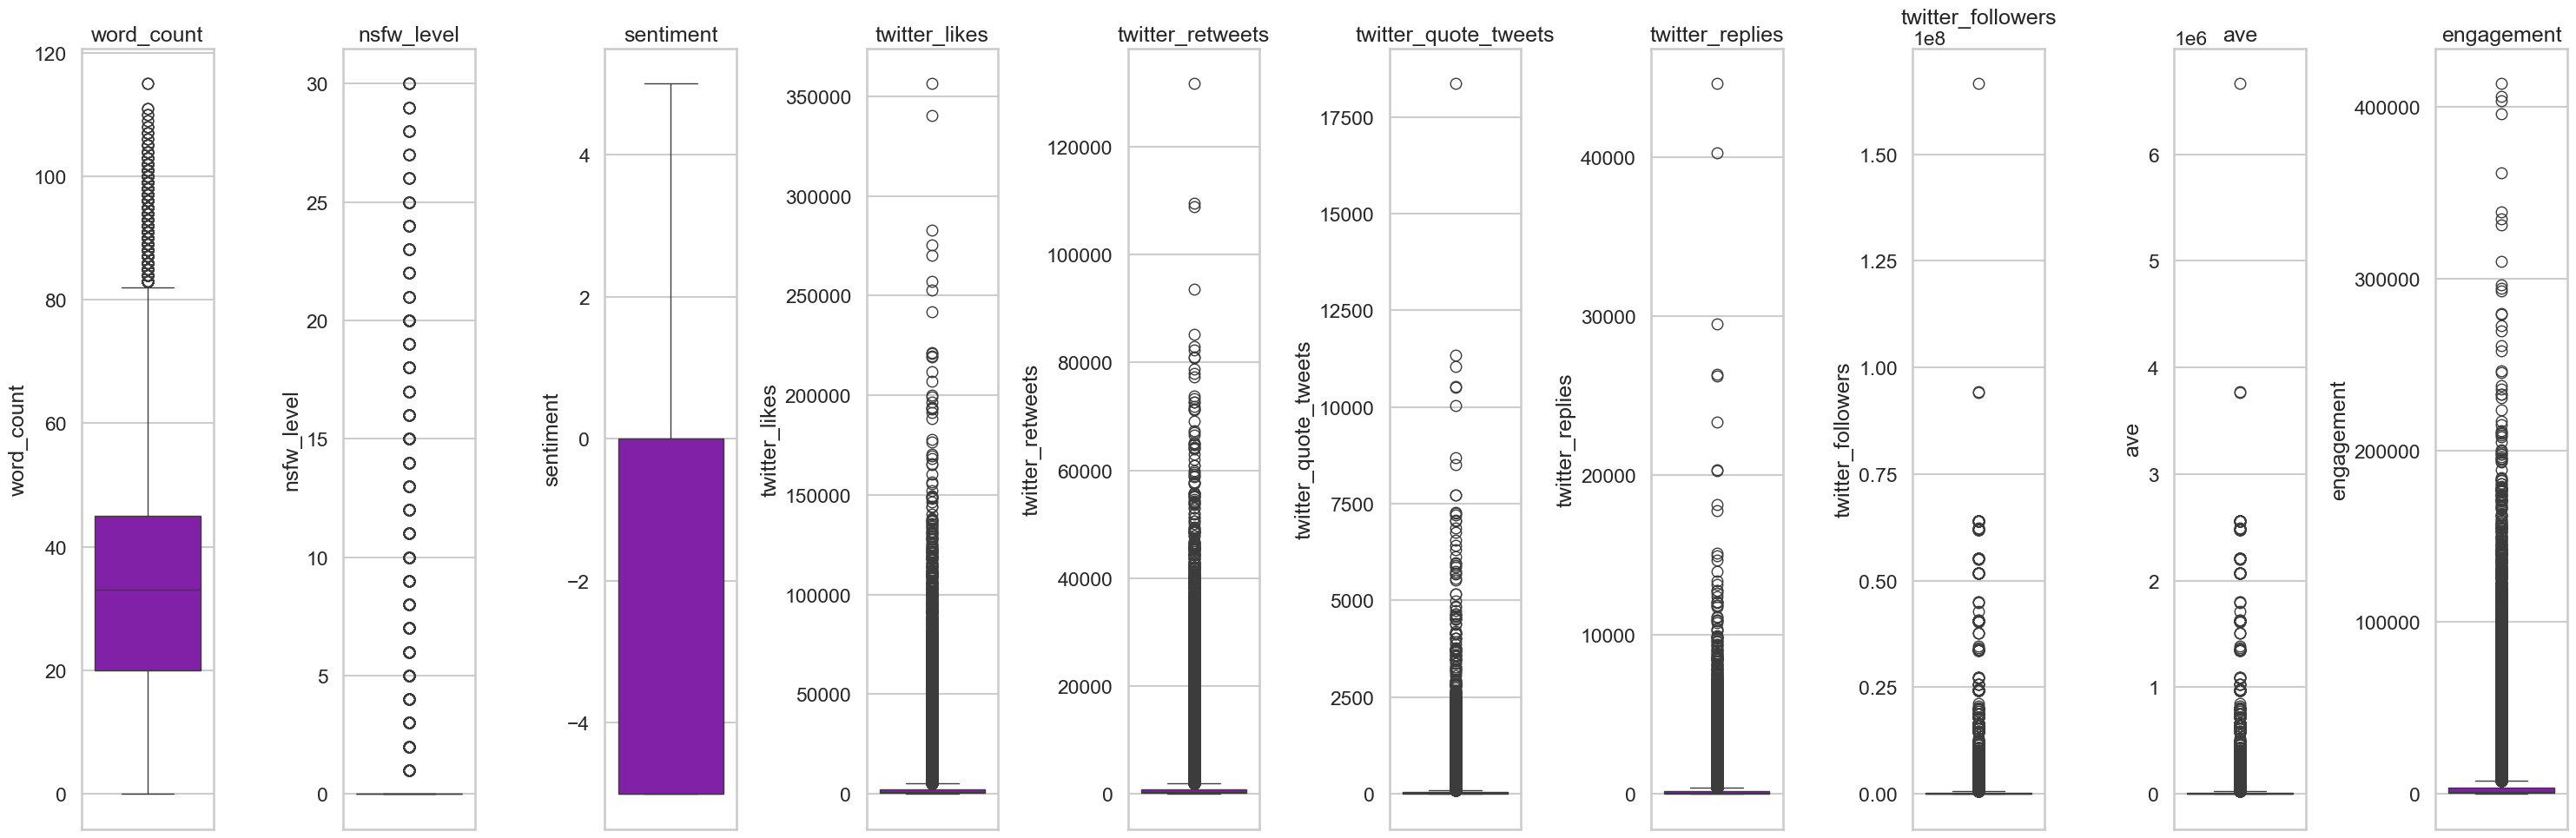

In [16]:
# Set up the matplotlib figure
fig, axes = plt.subplots(1, len(col_info['num_cols']), figsize=(30, 10))

# Iterate over each numerical feature to create a boxplot on its own subplot
for i, col in enumerate(col_info['num_cols']):
    sns.boxplot(y=tweets_df[col_info['num_cols']][col], ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('')


plt.tight_layout()
plt.show()


# Are there any redundant features due to high level of correlation?

<Axes: >

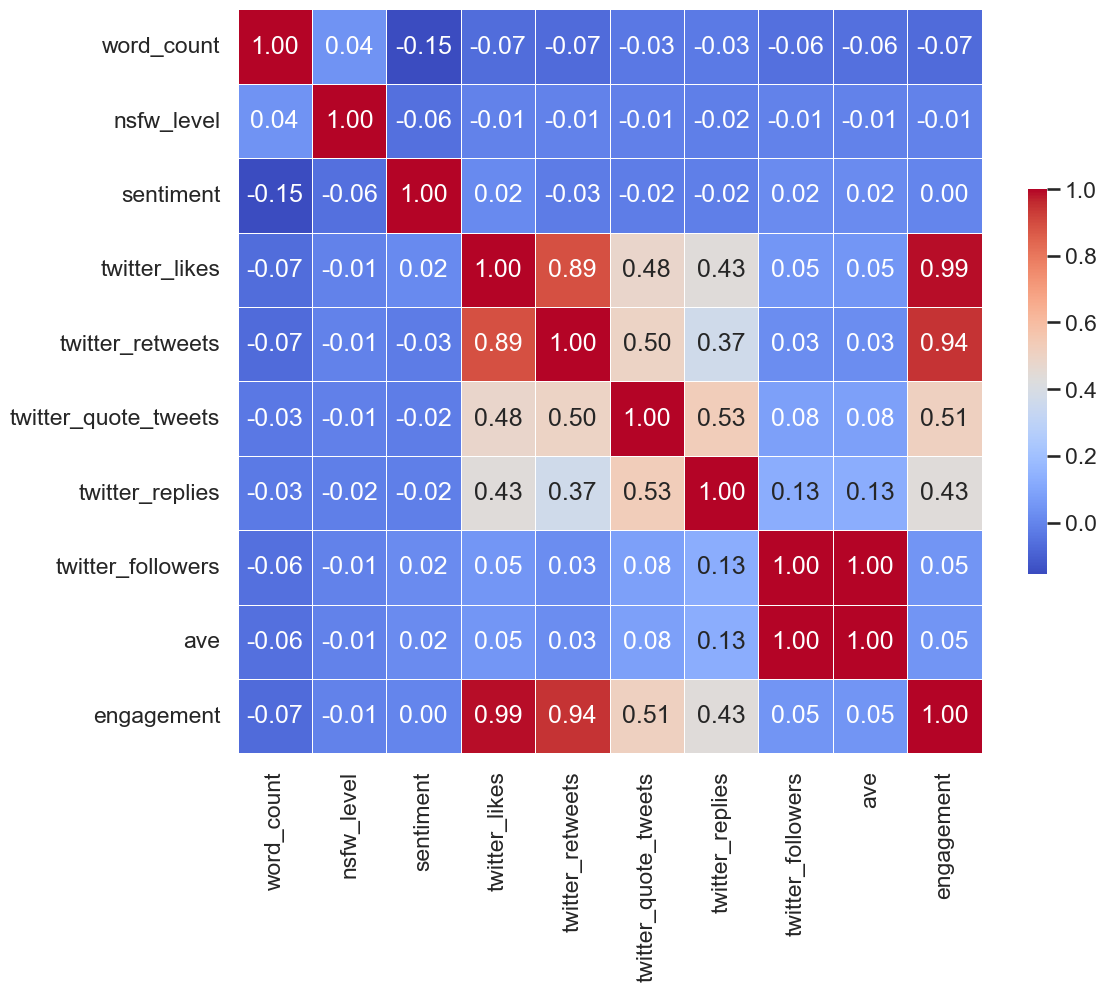

In [24]:
corr = tweets_df[col_info['num_cols']].corr()
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Conclusions:
1. Since AVE is fully correlated with the number of twitter followers, it's a redundant feature and will be removed
2. Engagement is the sum of likes, retweets, quote tweets and replies,therefore the others will be removed. 

## Now let's look at the sentiment over time, averaged by every week

<Axes: xlabel='date', ylabel='sentiment'>

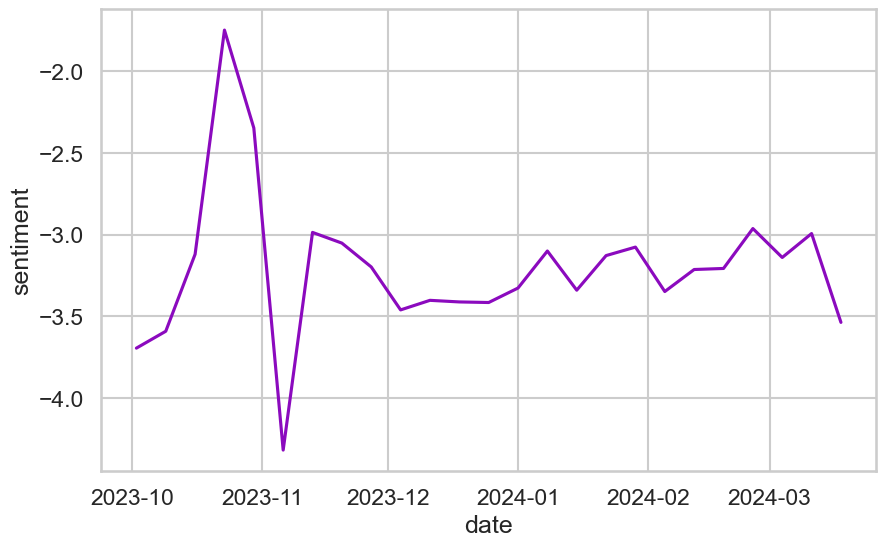

In [57]:
df_to_plot = (tweets_df.groupby(tweets_df['published'].dt.to_period('W'))
              .mean({'sentiment': 'sum'})
              .reset_index()
              .rename(columns={'published': 'date'})
              .sort_values(by='date'))
df_to_plot['date'] = df_to_plot['date'].apply(lambda x: x.start_time)
sns.lineplot(data=df_to_plot, x='date',y='sentiment')


## There is a big dip in the sentiment at the beginning of November. Can we attribute them to a specific type of posts?

In [54]:
start_date = '2023-11-01'
end_date = '2023-11-07'
filtered_df = (tweets_df[(tweets_df['published'] >= start_date) & (tweets_df['published'] <= end_date)]).sort_values(by='engagement', ascending=False)
filtered_df.head(n=10)

,published,url,content,lang,word_count,nsfw_level,sentiment,post_type,engagement,twitter_impressions,twitter_likes,twitter_retweets,twitter_quote_tweets,twitter_replies,twitter_followers,country,name,gender,description,ave
3786,2023-11-04 19:05:49,http://twitter.com/JoshuaPHilll/status/1720849...,Thousands of protesters are in front of Netany...,en,37,0,-5,TEXT,113894,5618684,85031,28024,839,484,294875,United States,Read Let This Radicalize You,FEMALE,Earthseed | Abolition | Anti-capitalism | (he/...,11795.00
3831,2023-11-05 22:45:44,http://twitter.com/AaronBastani/status/1721267...,"Gaza: “9,000 civilians have died” Joe Biden an...",en,45,0,-5,TEXT,92311,3517522,64754,27257,300,350,131870,United Kingdom,Aaron Bastani,MALE,"Co-Founder @novaramedia, Author of Fully Autom...",5274.80
3795,2023-11-04 21:01:45,http://twitter.com/IBJIYONGI/status/1720879020...,These Israeli protestors are calling Bibi a mu...,en,38,0,-5,TEXT,19148,561797,15103,3987,58,46,114333,United States,Chanda Prescod-Weinstein,FEMALE,Assoc. Prof: Physics/Astro/STS. Author: #Disor...,4573.32
3792,2023-11-04 20:04:48,http://twitter.com/IsraelWarRoom/status/172086...,They cut her Achilles so that she could not ru...,en,54,1,-5,TEXT,12045,625105,7748,4138,159,311,265325,United States,Israel War Room,FEMALE,Israel’s enemies do not sleep. Neither do we.,10613.00
3846,2023-11-06 09:06:54,http://twitter.com/AvivaKlompas/status/1721423...,Noa Argamani is being held hostage by Hamas. H...,en,31,0,-5,VIDEO,11907,243145,8193,3571,143,310,142155,Palestine,Aviva Klompas,FEMALE,Co-founder of Boundless 🌍 Former Head of Speec...,5686.20
3769,2023-11-04 11:26:31,http://twitter.com/IamYaure/status/17207342591...,"The sweet baby, Kfir bibas, who was brutally k...",en,37,0,-5,IMAGE,8179,252112,5538,2444,197,591,5245,India,Yaure 🎗,FEMALE,אמא שלי מתה ואני חיה.,209.80
3787,2023-11-04 19:17:36,http://twitter.com/IsraelDubai/status/17208528...,"Naama Levi, 19 years old, a volunteer in “Hand...",en,29,0,-5,VIDEO,7131,868031,4648,2255,228,345,7929,United Arab Emirates,Israel in Dubai 🇦🇪🇮🇱 اسرائيل في دبي,FEMALE,الحساب الرسمي للقنصلية العامة لدولة إسرائيل في...,317.16
3811,2023-11-05 14:58:23,http://twitter.com/lalshareef/status/172114996...,🚨IN MEMORY OF SHANI LOUK Don’t look away. Say ...,en,42,0,-5,VIDEO,6059,253627,4455,1482,122,514,188219,United Arab Emirates,Loay Alshareef لؤي الشريف,MALE,Promoting peace through a love of languages an...,7528.76
3821,2023-11-05 19:00:51,http://twitter.com/naftalibennett/status/17212...,4 year old Avigail saw her parents slaughtered...,en,35,0,-5,VIDEO,5962,131246,4336,1557,69,393,582450,Israel,Naftali Bennett בנט,MALE,ראש הממשלה ה-13 של מדינת ישראל • 13th Prime Mi...,23298.00
3734,2023-11-02 19:32:13,http://twitter.com/AvivaKlompas/status/1720131...,Held hostage: Ella and Dafna Elyakim The siste...,en,49,0,-5,IMAGE,5046,101980,3337,1634,75,177,135991,Palestine,Aviva Klompas,FEMALE,Co-founder of Boundless 🌍 Former Head of Speec...,5439.64


#### This is only a sample of the most viral posts, but most of them revolve around the hostages